In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report

In [2]:
df = pd.read_csv("C:/AI_study/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4177 non-null   int64  
 1   Sex             4177 non-null   object 
 2   Length          4177 non-null   float64
 3   Diameter        4177 non-null   float64
 4   Height          4177 non-null   float64
 5   Whole_weight    4177 non-null   float64
 6   Shucked_weight  4177 non-null   float64
 7   Viscera_weight  4177 non-null   float64
 8   Shell_weight    4177 non-null   float64
 9   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [4]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

## Features
- id: id
- Sex: 성별 M(수컷), F(암컷), I(유아기)
- Length: 길이(앞에서 뒤까지, mm)
- Diameter: 지름(길이에 수직인 방향, mm)
- Height: 높이(껍질 포함, mm)
- Whole_weight: 전체 무게(껍질 포함, g)
- Shucked_weight: 무게(껍질 제거, g)
- Viscera_weight: 전복 내장 무게(g)
- Shell_weight: 건조 후 껍질 무게(g)
- Rings: 나선(전복의 나이 추정, 나이 = Rings + 1.5) - label

- 현재 Features 중 id의 경우는 단순히 0 ~ 4176까지 나열한 것이므로 필요 없음
- Sex의 경우 object형으로 M, F, I를 값으로 가지기 때문에 EDA하고 모델에 넣기 위해 Label Encoding이 필요

In [5]:
# 필요 없는 Feature인 id 제거
df = df.drop('id', axis=1)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


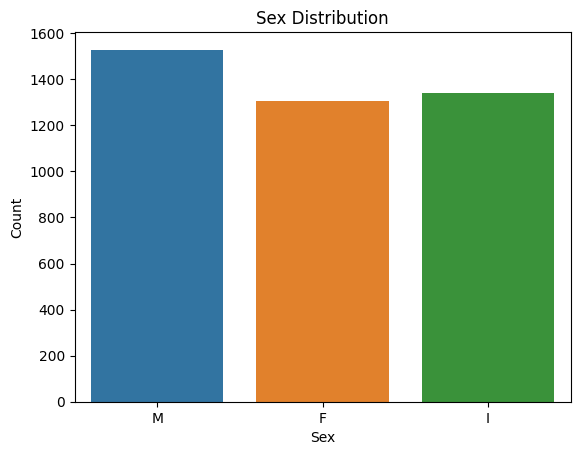

In [6]:
# Sex 분포 시각화
sns.countplot(data=df, x="Sex", hue="Sex", palette=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex Distribution")

plt.show()

In [7]:
# Sex 피처에 Label Encoding 적용

from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
le = LabelEncoder()

df['Sex_encoded'] = le.fit_transform(df['Sex'])

df = df.drop('Sex', axis=1)
df.insert(0, 'Sex_encoded', df.pop('Sex_encoded'))

# 결과 확인
print(df)

      Sex_encoded  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0               2   0.455     0.365   0.095        0.5140          0.2245   
1               2   0.350     0.265   0.090        0.2255          0.0995   
2               0   0.530     0.420   0.135        0.6770          0.2565   
3               2   0.440     0.365   0.125        0.5160          0.2155   
4               1   0.330     0.255   0.080        0.2050          0.0895   
...           ...     ...       ...     ...           ...             ...   
4172            0   0.565     0.450   0.165        0.8870          0.3700   
4173            2   0.590     0.440   0.135        0.9660          0.4390   
4174            2   0.600     0.475   0.205        1.1760          0.5255   
4175            0   0.625     0.485   0.150        1.0945          0.5310   
4176            2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1

In [8]:
df.describe()

,Sex_encoded,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
# 데이터 결측치 확인
df.isnull().sum()

Sex_encoded       0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [10]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

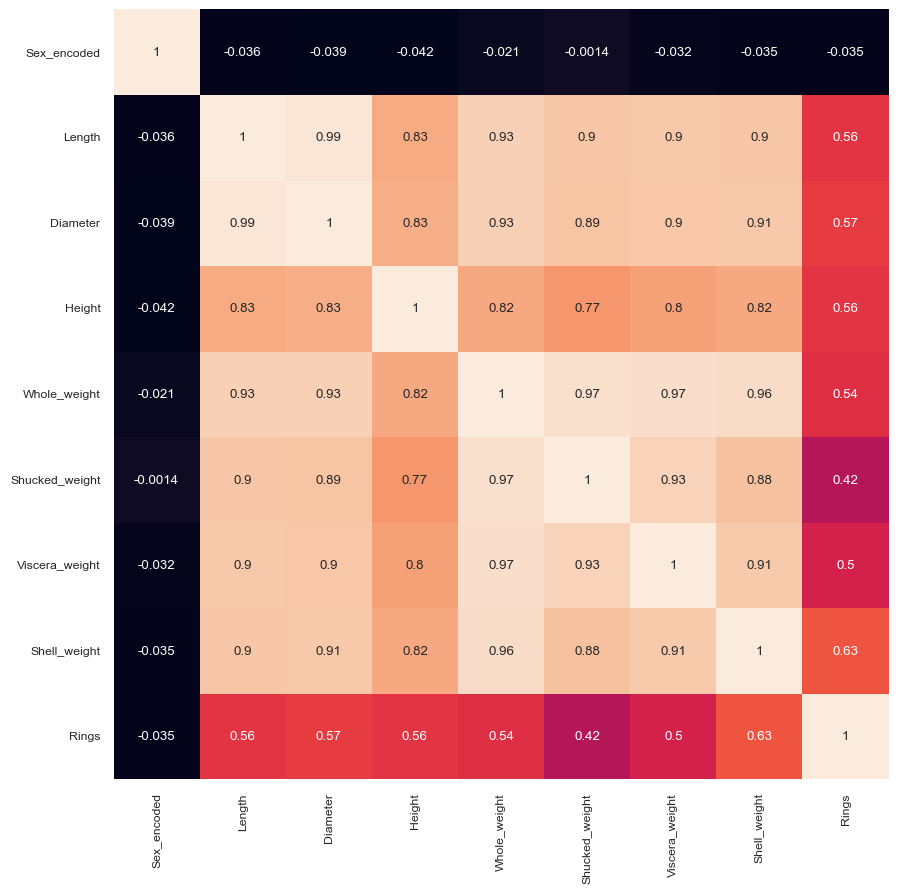

In [11]:
#상관관계 히트맵 생성
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

## Target인 Rings와 가장 높은 상관 관계를 맺는 feature
- Shell_weight(0.63)

## Target인 Rings와 비교적 낮은 상관 관계를 맺는 features
- Sex_encoded(-0.035)
- Shucked_weight(0.42)
- Visvera_weight(0.5)

- Sex_encoded의 경우 매우 낮은 상관 관계를 갖고 있기 때문에 추후에 삭제 가능 

array([[<Axes: title={'center': 'Sex_encoded'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole_weight'}>,
        <Axes: title={'center': 'Shucked_weight'}>],
       [<Axes: title={'center': 'Viscera_weight'}>,
        <Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

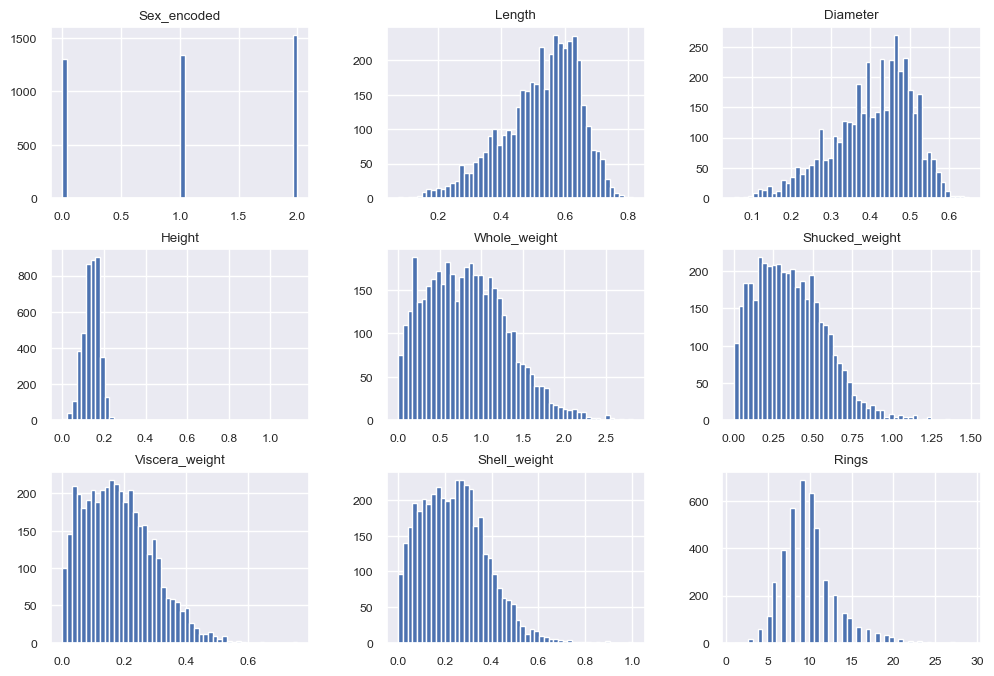

In [12]:
df.hist(bins=50, figsize=(12, 8))

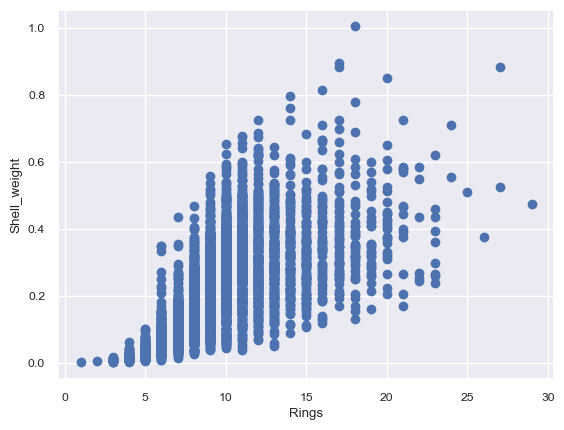

In [13]:
# Rings와 Shell_weight 관계
plt.scatter(df['Rings'], df['Shell_weight'])
plt.xlabel('Rings')
plt.ylabel('Shell_weight')

plt.show()

In [14]:
# 각 열에서 0인 값의 개수를 확인
zero_values_count = (df == 0).sum()

# 결과 출력
print(zero_values_count)

Sex_encoded       1307
Length               0
Diameter             0
Height               2
Whole_weight         0
Shucked_weight       0
Viscera_weight       0
Shell_weight         0
Rings                0
dtype: int64


#### Height(높이)가 0 값이 나오는 것은 이상치로 판단

In [15]:
# 이상치의 개수가 적은 Glucose, BloodPressure, BMI의 경우 이상치 제거
print("제거 전 데이터 개수: ", len(df))
df = df[(df['Height'] != 0)]
print("제거 후 데이터 개수: ", len(df))

제거 전 데이터 개수:  4177
제거 후 데이터 개수:  4175


2개의 데이터 제거

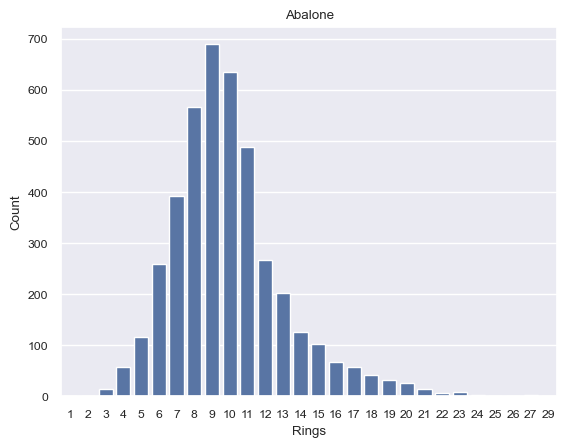

In [16]:
# Rings 시각화
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Abalone")

plt.show()

### Rings는 연속적인 수치 데이터를 가지므로 Classification 문제로 다루기 위해선 범주형 값으로 변환하는 과정이 필요

In [17]:
# 분위수 기반으로 구간 나누기
Rings_binned, bins = pd.qcut(df['Rings'], q=3, labels=['Young', 'Middle-aged', 'Old'], retbins=True)

# 구간 경계값 출력
print("구간 경계값: ", bins)

# 새로운 범주형 피처 생성
df['Rings_binned'] = Rings_binned

# 결과 확인
print(df[['Rings', 'Rings_binned']].head())

구간 경계값:  [ 1.  8. 11. 29.]
   Rings Rings_binned
0     15          Old
1      7        Young
2      9  Middle-aged
3     10  Middle-aged
4      7        Young


### pd.qcut 함수를 통해 각 구간에 비슷한 개수의 샘플이 있도록 분위수를 기준으로 구간을 나눔
- 구간 경계 값을 출력한 결과 (1 ~ 7, 8 ~ 10, 11 ~ 29)의 세 구간('Young', 'Middle-aged', 'Old')으로 나눠진 것을 확인할 수 있음

In [18]:
df['Rings_binned'].value_counts()

Rings_binned
Middle-aged    1810
Young          1405
Old             960
Name: count, dtype: int64

### 분위 수를 기반으로 나눴지만 Middle-aged와 Old 간의 차이가 두 배정도 나는 것을 확인할 수 있음
- 추후 OverSampling, UnderSampling 등을 적용할 수 있음

In [19]:
# 분류 문제로 적용하기 위해서 Rings 제거
X = df.drop('Rings', axis=1)
X

,Sex_encoded,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings_binned
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,Old
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,Young
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,Middle-aged
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,Middle-aged
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,Young
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,Middle-aged
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,Middle-aged
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,Middle-aged
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,Middle-aged


In [20]:
y = X['Rings_binned']
y

0               Old
1             Young
2       Middle-aged
3       Middle-aged
4             Young
           ...     
4172    Middle-aged
4173    Middle-aged
4174    Middle-aged
4175    Middle-aged
4176            Old
Name: Rings_binned, Length: 4175, dtype: category
Categories (3, object): ['Young' < 'Middle-aged' < 'Old']

In [21]:
X = X.drop('Rings_binned', axis=1)
X

,Sex_encoded,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((2672, 8), (835, 8), (2672,), (835,), (668, 8), (668,))

In [23]:
# 표준화 StandardScaler 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
val_scaled = ss.transform(X_val)
test_scaled = ss.transform(X_test)

## DL Model (ANN)
- Rings_binned는 세 가지 값을 가지므로 One-hot encoding을 진행함
- 3진 분류의 문제이므로 Output은 3개의 뉴런
- 마찬가지로 3진 분류이므로 activation 함수는 softmax, loss function은 categorical_crossentropy 사용

In [24]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [25]:
from tensorflow.keras.utils import to_categorical

trainy_one_hot = to_categorical(y_train_encoded)
val_one_hot = to_categorical(y_val_encoded)
testy_one_hot = to_categorical(y_test_encoded)

In [26]:
trainy_one_hot.shape, val_one_hot.shape, testy_one_hot.shape

((2672, 3), (668, 3), (835, 3))

In [27]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(3, activation='softmax', input_shape=(8,)))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 27        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [28]:
batch_size = 16

train_epochs = 50
history = model.fit(train_scaled, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, validation_data=(val_scaled, val_one_hot), verbose=True, shuffle=True)

Epoch 1/50
167/167 [==============================] - 1s 2ms/step - loss: 1.4022 - accuracy: 0.2216 - val_loss: 1.0865 - val_accuracy: 0.4237
Epoch 2/50
167/167 [==============================] - 0s 2ms/step - loss: 0.9560 - accuracy: 0.5176 - val_loss: 0.9208 - val_accuracy: 0.5374
Epoch 3/50
167/167 [==============================] - 0s 2ms/step - loss: 0.8664 - accuracy: 0.5865 - val_loss: 0.8800 - val_accuracy: 0.5749
Epoch 4/50
167/167 [==============================] - 0s 2ms/step - loss: 0.8372 - accuracy: 0.6055 - val_loss: 0.8615 - val_accuracy: 0.5853
Epoch 5/50
167/167 [==============================] - 0s 2ms/step - loss: 0.8209 - accuracy: 0.6123 - val_loss: 0.8495 - val_accuracy: 0.5943
Epoch 6/50
167/167 [==============================] - 0s 2ms/step - loss: 0.8091 - accuracy: 0.6149 - val_loss: 0.8407 - val_accuracy: 0.5913
Epoch 7/50
167/167 [==============================] - 0s 2ms/step - loss: 0.7999 - accuracy: 0.6160 - val_loss: 0.8330 - val_accuracy: 0.5943
Epoch 

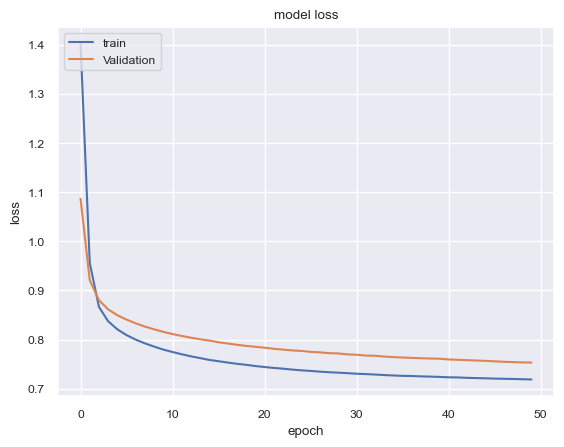

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

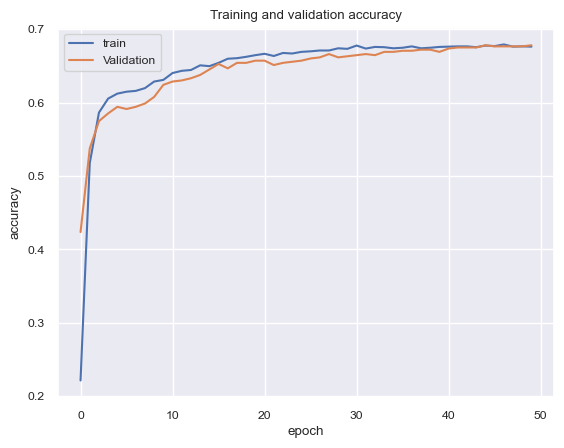

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

27/27 [==============================] - 0s 1ms/step
[[264  24  74]
 [107  71  14]
 [ 76   3 202]]
0.6431137724550898
0.6336430623993496
              precision    recall  f1-score   support

           0       0.59      0.73      0.65       362
           1       0.72      0.37      0.49       192
           2       0.70      0.72      0.71       281

    accuracy                           0.64       835
   macro avg       0.67      0.61      0.62       835
weighted avg       0.66      0.64      0.63       835



<Axes: >

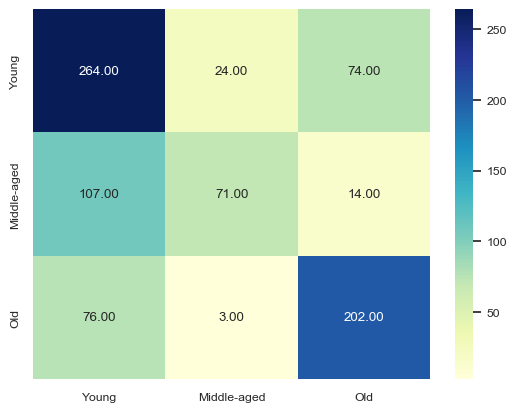

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(test_scaled)
predy=np.argmax(predy, axis=-1)
LABELS = ['Young', 'Middle-aged', 'Old']
cm=confusion_matrix(y_test_encoded,predy)
print(cm)
print(accuracy_score(y_test_encoded,predy))
print(f1_score(y_test_encoded,predy, average='weighted'))
print(classification_report(y_test_encoded,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

## DL Model(DNN)

In [32]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(8,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 16)                208       
                                                                 
 dense_4 (Dense)             (None, 12)                204       
                                                                 
 dense_5 (Dense)             (None, 3)                 39        
                                                                 
Total params: 631
Trainable params: 631
Non-trainable params: 0
_________________________________________________________________


In [33]:
batch_size = 16

train_epochs = 50
history = model.fit(train_scaled, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, validation_data=(val_scaled, val_one_hot), verbose=True, shuffle=True)

Epoch 1/50
167/167 [==============================] - 1s 3ms/step - loss: 0.9073 - accuracy: 0.5906 - val_loss: 0.8558 - val_accuracy: 0.5883
Epoch 2/50
167/167 [==============================] - 0s 2ms/step - loss: 0.8115 - accuracy: 0.6276 - val_loss: 0.8281 - val_accuracy: 0.6332
Epoch 3/50
167/167 [==============================] - 0s 2ms/step - loss: 0.7817 - accuracy: 0.6519 - val_loss: 0.8028 - val_accuracy: 0.6377
Epoch 4/50
167/167 [==============================] - 0s 2ms/step - loss: 0.7593 - accuracy: 0.6613 - val_loss: 0.7908 - val_accuracy: 0.6572
Epoch 5/50
167/167 [==============================] - 0s 3ms/step - loss: 0.7420 - accuracy: 0.6684 - val_loss: 0.7820 - val_accuracy: 0.6617
Epoch 6/50
167/167 [==============================] - 0s 3ms/step - loss: 0.7259 - accuracy: 0.6707 - val_loss: 0.7552 - val_accuracy: 0.6811
Epoch 7/50
167/167 [==============================] - 0s 2ms/step - loss: 0.7129 - accuracy: 0.6748 - val_loss: 0.7484 - val_accuracy: 0.6871
Epoch 

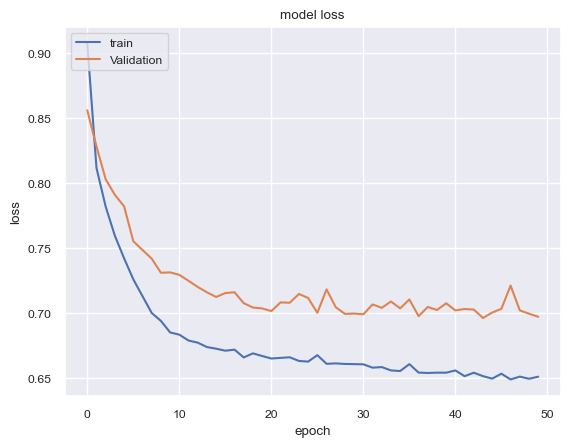

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

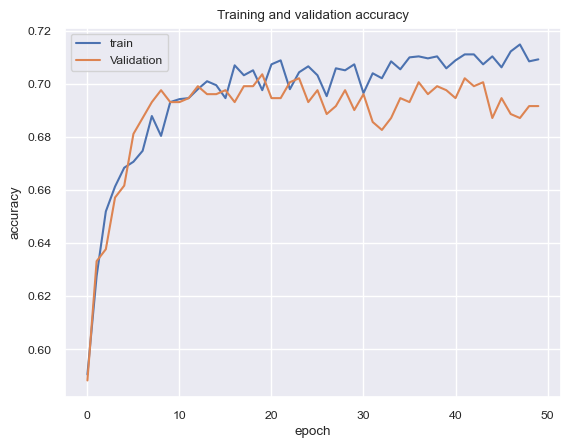

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

27/27 [==============================] - 0s 2ms/step
[[271  36  55]
 [ 95  91   6]
 [ 71   6 204]]
0.6778443113772455
0.6743233226569733
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       362
           1       0.68      0.47      0.56       192
           2       0.77      0.73      0.75       281

    accuracy                           0.68       835
   macro avg       0.69      0.65      0.66       835
weighted avg       0.69      0.68      0.67       835



<Axes: >

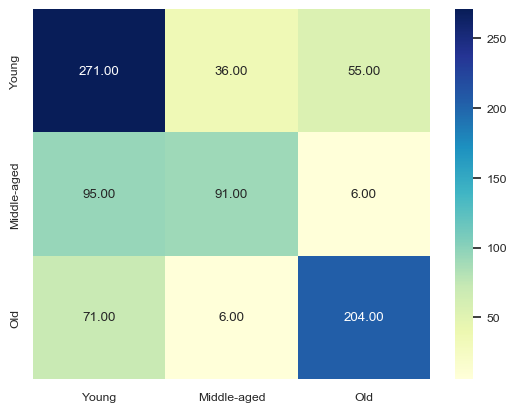

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(test_scaled)
predy=np.argmax(predy, axis=-1)
LABELS = ['Young', 'Middle-aged', 'Old']
cm=confusion_matrix(y_test_encoded,predy)
print(cm)
print(accuracy_score(y_test_encoded,predy))
print(f1_score(y_test_encoded,predy, average='weighted'))
print(classification_report(y_test_encoded,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

### 데이터 전처리 단계에서 정확도 올리기
- Rings와 상관관계가 비교적 낮았던 Sex_encoded, Shucked_weight 제거
- Smote 함수를 사용한 label OverSampling

In [37]:
# df에서 Sex_encoded, Shucked_weight 제거
df = df.drop(['Sex_encoded'], axis=1)
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Rings_binned
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,Old
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,Young
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,Middle-aged
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,Middle-aged
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,Young
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,Middle-aged
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,Middle-aged
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,Middle-aged
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,Middle-aged


In [38]:
# 분류 문제로 적용하기 위해서 Rings 제거
X = df.drop('Rings', axis=1)
X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings_binned
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,Old
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,Young
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,Middle-aged
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,Middle-aged
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,Young
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,Middle-aged
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,Middle-aged
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,Middle-aged
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,Middle-aged


In [39]:
y = X['Rings_binned']
y

0               Old
1             Young
2       Middle-aged
3       Middle-aged
4             Young
           ...     
4172    Middle-aged
4173    Middle-aged
4174    Middle-aged
4175    Middle-aged
4176            Old
Name: Rings_binned, Length: 4175, dtype: category
Categories (3, object): ['Young' < 'Middle-aged' < 'Old']

In [40]:
X = X.drop('Rings_binned', axis=1)
X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((2672, 7), (835, 7), (2672,), (835,), (668, 7), (668,))

In [42]:
from imblearn.over_sampling import SMOTE

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [43]:
# 결과 확인
print("원래 데이터셋 크기:", X_train.shape)
print("오버샘플링된 데이터셋 크기:", X_train_resampled.shape)

원래 데이터셋 크기: (2672, 7)
오버샘플링된 데이터셋 크기: (3477, 7)


In [44]:
# 클래스 분포 확인
print("오버샘플링 전 클래스 분포:\n", y_train.value_counts())
print("오버샘플링 후 클래스 분포:\n", y_train_resampled.value_counts())

오버샘플링 전 클래스 분포:
 Rings_binned
Middle-aged    1159
Young           899
Old             614
Name: count, dtype: int64
오버샘플링 후 클래스 분포:
 Rings_binned
Young          1159
Middle-aged    1159
Old            1159
Name: count, dtype: int64


C:\Users\yc_hur\AppData\Local\Temp\ipykernel_21088\1542653737.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=["#1f77b4", "#ff7f0e", "#2ca02c"], legend=False)


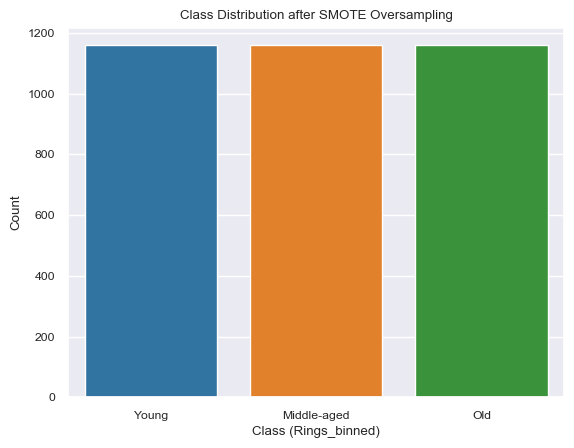

In [45]:
# 오버샘플링된 클래스 분포를 시리즈로 만듦
class_distribution = y_train_resampled.value_counts()

# 시각화
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=["#1f77b4", "#ff7f0e", "#2ca02c"], legend=False)

# 그래프 설정
plt.xlabel('Class (Rings_binned)')
plt.ylabel('Count')
plt.title('Class Distribution after SMOTE Oversampling')

# 그래프 출력
plt.show()

In [46]:
# 표준화 StandardScaler 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train_resampled)
train_scaled = ss.transform(X_train_resampled)
val_scaled = ss.transform(X_val)
test_scaled = ss.transform(X_test)

In [47]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled) 
y_val_encoded = label_encoder.transform(y_val) 
y_test_encoded = label_encoder.transform(y_test)

In [48]:
from tensorflow.keras.utils import to_categorical

trainy_one_hot = to_categorical(y_train_encoded)
val_one_hot = to_categorical(y_val_encoded)
testy_one_hot = to_categorical(y_test_encoded)

In [49]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(7,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 64        
                                                                 
 dense_7 (Dense)             (None, 12)                108       
                                                                 
 dense_8 (Dense)             (None, 16)                208       
                                                                 
 dense_9 (Dense)             (None, 12)                204       
                                                                 
 dense_10 (Dense)            (None, 3)                 39        
                                                                 
Total params: 623
Trainable params: 623
Non-trainable params: 0
_________________________________________________________________


In [50]:
batch_size = 16

train_epochs = 50
history = model.fit(train_scaled, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, validation_data=(val_scaled, val_one_hot), verbose=True, shuffle=True)

Epoch 1/50
218/218 [==============================] - 1s 3ms/step - loss: 0.9407 - accuracy: 0.5234 - val_loss: 0.8661 - val_accuracy: 0.5314
Epoch 2/50
218/218 [==============================] - 1s 2ms/step - loss: 0.8108 - accuracy: 0.5861 - val_loss: 0.8586 - val_accuracy: 0.5913
Epoch 3/50
218/218 [==============================] - 1s 2ms/step - loss: 0.7722 - accuracy: 0.6431 - val_loss: 0.8161 - val_accuracy: 0.6452
Epoch 4/50
218/218 [==============================] - 1s 2ms/step - loss: 0.7469 - accuracy: 0.6595 - val_loss: 0.8052 - val_accuracy: 0.6527
Epoch 5/50
218/218 [==============================] - 1s 2ms/step - loss: 0.7246 - accuracy: 0.6701 - val_loss: 0.8056 - val_accuracy: 0.6437
Epoch 6/50
218/218 [==============================] - 1s 3ms/step - loss: 0.7156 - accuracy: 0.6655 - val_loss: 0.8024 - val_accuracy: 0.6437
Epoch 7/50
218/218 [==============================] - 1s 2ms/step - loss: 0.7097 - accuracy: 0.6744 - val_loss: 0.7919 - val_accuracy: 0.6527
Epoch 

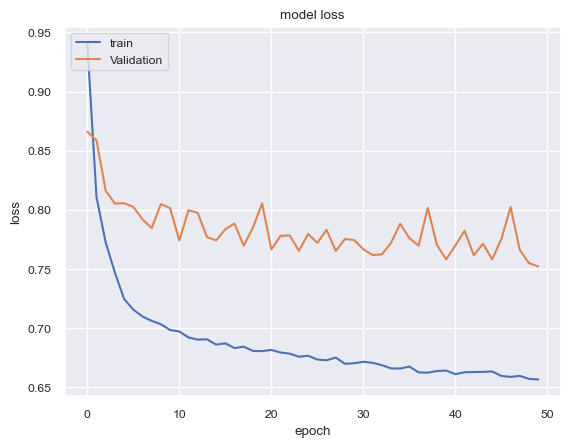

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

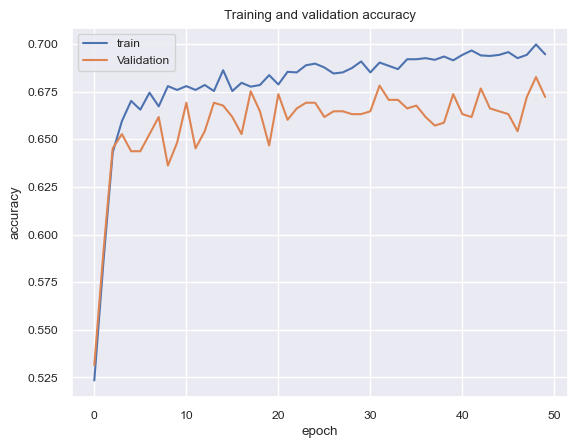

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

27/27 [==============================] - 0s 688us/step
[[211  77  74]
 [ 56 129   7]
 [ 44  17 220]]
0.6706586826347305
0.6692135530250716
              precision    recall  f1-score   support

           0       0.68      0.58      0.63       362
           1       0.58      0.67      0.62       192
           2       0.73      0.78      0.76       281

    accuracy                           0.67       835
   macro avg       0.66      0.68      0.67       835
weighted avg       0.67      0.67      0.67       835



<Axes: >

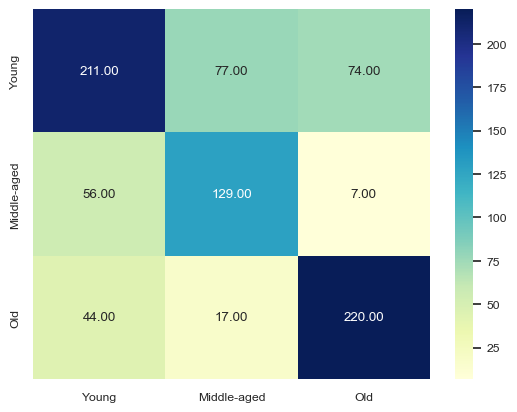

In [53]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(test_scaled)
predy=np.argmax(predy, axis=-1)
LABELS = ['Young', 'Middle-aged', 'Old']
cm=confusion_matrix(y_test_encoded,predy)
print(cm)
print(accuracy_score(y_test_encoded,predy))
print(f1_score(y_test_encoded,predy, average='weighted'))
print(classification_report(y_test_encoded,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')